# Supervised Learning: Classification of Handwritten Digits

In this section we'll apply scikit-learn to the classification of handwritten
digits.  This will go a bit beyond the iris classification we saw before: we'll
discuss some of the metrics which can be used in evaluating the effectiveness
of a classification model.

We'll work with the handwritten digits dataset which we saw in an earlier
section of the tutorial.

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

We'll re-use some of our code from before to visualize the data and remind us what
we're looking at:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

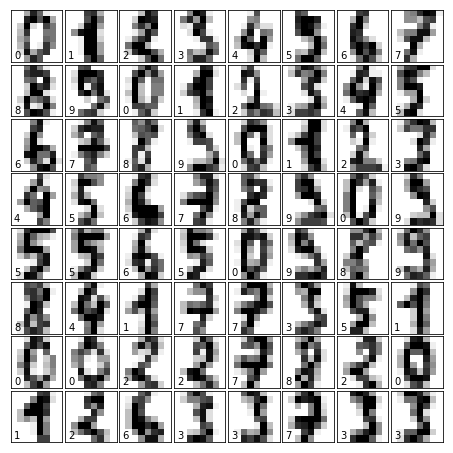

In [5]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Visualizing the Data

A good first-step for many problems is to visualize the data using one of the
*Dimensionality Reduction* techniques we saw earlier.  We'll start with the
most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest
variance, and as such, can help give you a good idea of the structure of the
data set.  Here we'll use `RandomizedPCA`, because it's faster for large `N`.

In [6]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=1999)
proj = pca.fit_transform(digits.data)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


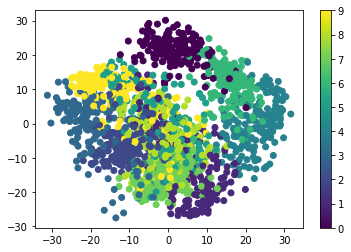

In [7]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

Here we see that the digits do cluster fairly well, so we can expect even
a fairly naive classification scheme to do a decent job separating them.

A weakness of PCA is that it produces a linear dimensionality reduction:
this may miss some interesting relationships in the data.  If we want to
see a nonlinear mapping  of the data, we can use one of the several
methods in the `manifold` module.  Here we'll use Isomap (a concatenation
of Isometric Mapping) which is a manifold learning method based on
graph theory:

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)

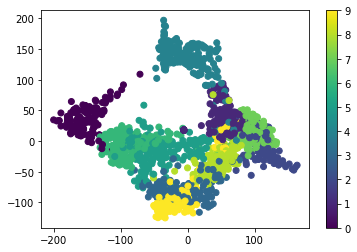

In [9]:
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

It can be fun to explore the various manifold learning methods available,
and how the output depends on the various parameters used to tune the
projection.
In any case, these visualizations show us that there is hope: even a simple
classifier should be able to adequately identify the members of the various
classes.

**Question: Given these projections of the data, which numbers do you think
a classifier might have trouble distinguishing?**

## Gaussian Naive Bayes Classification

For most classification problems, it's nice to have a simple, fast, go-to
method to provide a quick baseline classification.  If the simple and fast
method is sufficient, then we don't have to waste CPU cycles on more complex
models.  If not, we can use the results of the simple method to give us
clues about our data.

One good method to keep in mind is Gaussian Naive Bayes.  It is a *generative*
classifier which fits an axis-aligned multi-dimensional Gaussian distribution to
each training label, and uses this to quickly give a rough classification.  It
is generally not sufficiently accurate for real-world data, but can perform surprisingly well.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

**Question**: why did we split the data into training and validation sets?

Let's plot the digits again with the predicted labels to get an idea of
how well the classification is working:

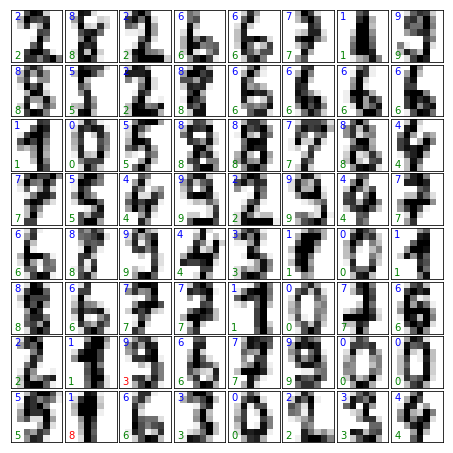

In [24]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
    ax.text(0, 1, str(expected[i]), color='blue')

## Quantitative Measurement of Performance

We'd like to measure the performance of our estimator without having to resort
to plotting examples.  A simple method might be to simply compare the number of
matches:

In [25]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

375
450


In [ ]:
matches.sum() / float(len(matches))

We see that nearly 1500 of the 1800 predictions match the input.  But there are other
more sophisticated metrics that can be used to judge the performance of a classifier:
several are available in the ``sklearn.metrics`` submodule.

We can also use ``clf.score`` as a helper method to calculate how well the classifier performs.

In [ ]:
print(clf.score(X_test, y_test))